In [52]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('../data/student_clustering.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


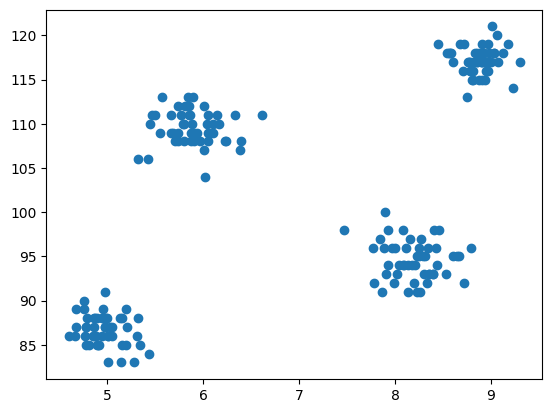

In [54]:
plt.scatter(df['cgpa'],df['iq'])
plt.show()

## Within-Cluster Sum of Squares (WCSS)

Within-Cluster Sum of Squares (WCSS) is a metric used to evaluate the performance of clustering algorithms, particularly K-means clustering. It measures the compactness of the clusters formed by the algorithm.

WCSS is calculated as the sum of squared distances between each data point and its assigned cluster centroid. Mathematically, it can be represented as:

\[
WCSS = \sum_{i=1}^{K} \sum_{x \in C_i} ||x - \mu_i||^2
\]


Where:
- \(K\) is the number of clusters.
- \(C_i\) represents the ith cluster.
- \(\mu_i\) is the centroid of the ith cluster.
- \(||x - \mu_i||\) denotes the Euclidean distance between data point \(x\) and centroid \(\mu_i\).

The goal of K-means clustering is to minimize the WCSS. A lower WCSS indicates that the clusters are more compact and well-separated. However, it's important to note that WCSS tends to decrease as the number of clusters (\(K\)) increases, which can lead to overfitting. 

The Elbow Method is a common technique used to determine the optimal number of clusters by plotting the WCSS against the number of clusters and selecting the point where the rate of decrease sharply changes, forming an "elbow" in the plot.


In [55]:
# Within-Cluster Sum of Squares
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [56]:
wcss

[29957.898287999997,
 4184.141269999999,
 2503.3975810000015,
 681.9696600000001,
 514.1616803171117,
 446.7098889069187,
 351.8492527559741,
 240.7551346189791,
 216.47899829123534,
 187.30988093998556]

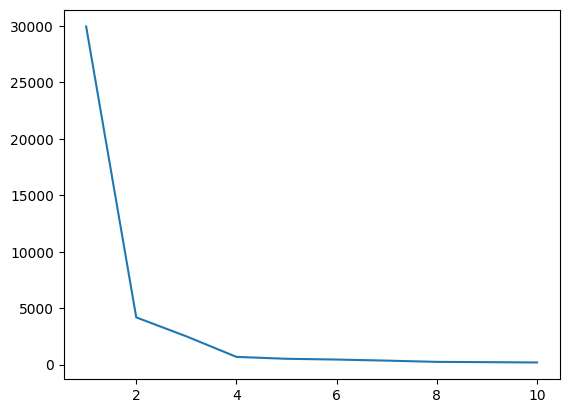

In [57]:
plt.plot(range(1,11),wcss)
plt.show()

In [58]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [59]:
y_means

array([1, 0, 3, 3, 0, 0, 3, 2, 0, 3, 1, 0, 3, 1, 0, 3, 0, 3, 0, 0, 3, 1,
       3, 1, 1, 3, 1, 2, 3, 0, 2, 0, 2, 0, 3, 3, 2, 0, 1, 0, 1, 3, 3, 1,
       2, 2, 3, 0, 2, 0, 1, 1, 2, 3, 2, 0, 0, 2, 0, 2, 0, 3, 3, 2, 1, 2,
       3, 1, 0, 3, 0, 2, 3, 1, 0, 2, 0, 2, 1, 3, 3, 2, 0, 1, 2, 1, 2, 0,
       2, 0, 2, 2, 3, 1, 3, 3, 2, 3, 1, 2, 0, 1, 1, 2, 1, 1, 3, 1, 2, 2,
       3, 2, 0, 0, 3, 2, 3, 0, 2, 1, 1, 0, 3, 2, 3, 1, 3, 0, 1, 3, 3, 0,
       1, 1, 0, 2, 0, 1, 3, 3, 3, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2,
       1, 3, 0, 2, 0, 3, 1, 2, 0, 3, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 3,
       2, 0, 1, 2, 2, 0, 0, 0, 3, 1, 3, 3, 2, 0, 3, 3, 1, 1, 3, 1, 2, 0,
       0, 2], dtype=int32)

In [60]:
X[y_means == 3,1]

array([ 93.,  97.,  98.,  94.,  97.,  95.,  91.,  98.,  92.,  98.,  94.,
        96.,  96.,  96.,  93.,  94.,  96.,  96.,  95.,  93.,  95.,  94.,
        92.,  91.,  92.,  95.,  94.,  95.,  92.,  94.,  91.,  95.,  93.,
        97.,  98.,  96.,  93., 100.,  96.,  94.,  95.,  93.,  92.,  98.,
        96.,  93.,  91.,  93.,  94.,  96.])

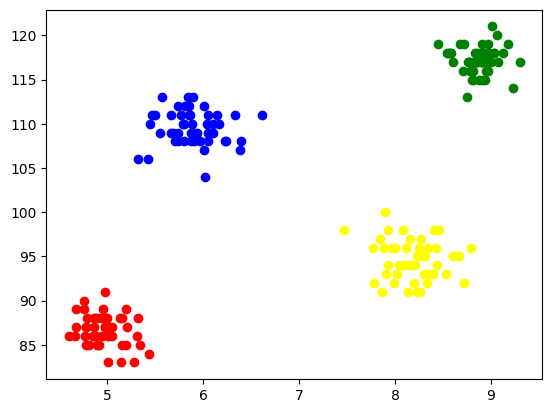

In [61]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()

## K-Means on 3-D Data


In [62]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [63]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [64]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

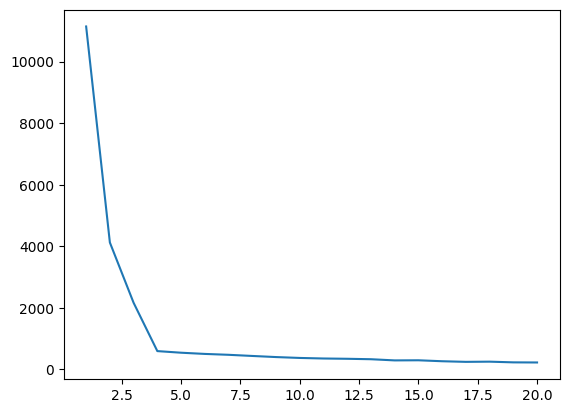

In [65]:
plt.plot(range(1,21),wcss)
plt.show()

In [66]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [67]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [68]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()